In [1]:
%%script bash
cd cpp
python3 setup.py build

running build
running build_py
running build_ext


In [2]:
# Import faster C++ implementation
import sys
from glob import glob
sys.path.append(glob("cpp/build/lib*/")[0])

from radtree import critical_path

In [3]:
#critical_path(21_410_000, 256, 2.7, 1000.0)

dataset = {
    460: 12.58e3,
    767: 13.93e3,
    898: 14.98e3,
    1_602: 14.62e3,
    239_763: 19.41e3,
    504_850: 22.67e3,
    1_327_505: 25.13e3,
    1_806_035: 56.22e3,
    3_011_099: 33.19e3,
    21_410_970: 518e3
}
m = 256

critical_path([460], 256, 2.0, 2.0)

[36]

In [17]:
%matplotlib notebook
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np


# Try to fit a curve onto the data.


X = np.fromiter(dataset.keys(), dtype=int)
Y = np.fromiter(dataset.values(), dtype=np.float64)


def function(ns, t_send, t_add, t_const):
    return np.array(critical_path(list(map(int, ns)), m, t_send, t_add)) + t_const

popt, pcov = curve_fit(function, X, Y, bounds=([4.0, 0.5, -500], [1e5, 200, 500]))



[ 14364.  14626.  14626.  14889.  18276.  20524.  30950.  34952.  47539.
 279782.]


<IPython.core.display.Javascript object>


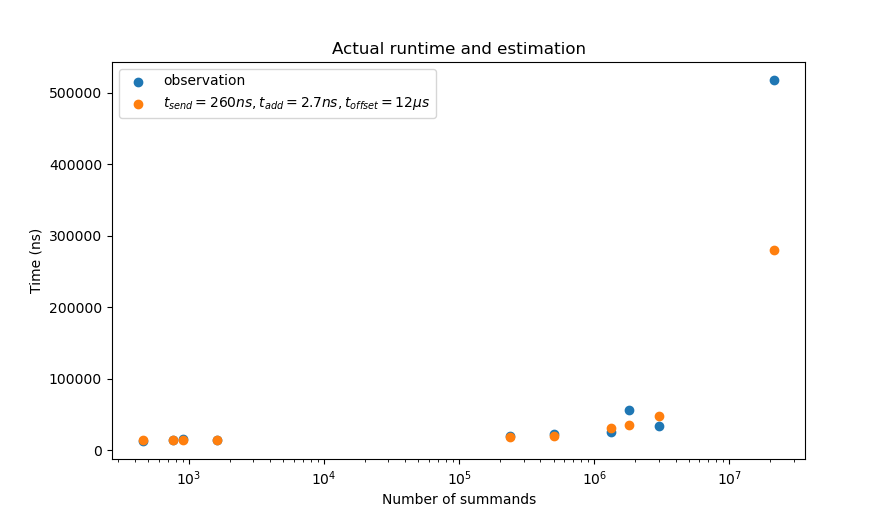

In [23]:
projectedY = function(X, 260.0, 2.7, 12000.0)

print(projectedY)
f = plt.figure()
ax = f.subplots(1)
plt.title(f"Actual runtime and estimation")
ax.set_xlabel("Number of summands")
ax.set_ylabel("Time (ns)")
#ax.yaxis.set_major_formatter(EngFormatter('ns'))
ax.semilogx()

ax.scatter(X, Y, label="observation")
ax.scatter(X, projectedY, label="$t_{send} = 260ns, t_{add}=2.7ns, t_{offset} = 12µs$")

ax.legend(loc='upper left')

plt.show()